# Import the necessary packages.

In [146]:
%matplotlib inline
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib as mpl
import math

In [147]:
from matplotlib import font_manager

font_path = 'C:\Windows\Fonts\SEGOEUI.TTF'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = prop.get_name()

In [148]:
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [149]:
# import matplotlib.font_manager
# from IPython.core.display import HTML

# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [150]:
mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = ['Lucida Grande'] # ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.stretch'] = 'extra-condensed'
### CAN WE IMPORT CUSTOM FONTS
### EXPORT SVG
### REDUCE FONT SIZE

# Project Information

In [151]:
# Blank

# Import and check the data

In [152]:
# Energy consumption 
# Existing    =   [11.895,                     6.8348,             10.002,         51.5142,            23.011] # Assuming 10% of energy for heating and cooling used for fans
# Envelope    =   [11.895,                     4.5761,             10.1835,        31.0014,            23.011]
# LED         =   [11.895,                ]
# Design      =   [131490,                     59175,              216054,         169969.9,           132103]
# end_uses    =   ["Receptacle equipment",   "Pumps and Fans",   "Cooling",    "Heating",        "Lighting"]

In [153]:
end_uses = ["Receptacle Equipment", "Pumps and Fans", "Cooling", "Heating", "Lighting"]
Existing = [11.895, 6.835, 10.003, 51.514, 23.011]
Envelope = [11.895, 4.576, 10.184, 31.001, 23.011]
LED_Smart_Controls = [8.921, 4.936, 7.273, 37.151, 7.665]
ERV_VRF = [8.921, 7.869, 5.255, 4.875, 7.665]

num_of_bars = 4

In [154]:
# df = pd.read_csv("B246EndUses.csv",index_col="End Use")
df = pd.DataFrame(
    list(zip(Existing, Envelope, LED_Smart_Controls, ERV_VRF)),
    index= end_uses,
    columns = ["Kirtland Hall\nExisting", "Passive House\nEnvelope", "LED & Smart\nControls", "All-Electric\nHVAC"])

In [155]:
# # Convert kWh to kBtu
# df = df * 3.412141

# # Convert to EUI
area = 25529.41217 # ft2
# df = df / area

In [156]:
# Format and view dataframe
df = df.T
# df = df.drop("Total Energy Use Intensity", axis=1)
columns = df.columns.tolist()
# columns = columns[::-1]
df = df[columns]
df.head()

,Receptacle Equipment,Pumps and Fans,Cooling,Heating,Lighting
Kirtland Hall\nExisting,11.895,6.835,10.003,51.514,23.011
Passive House\nEnvelope,11.895,4.576,10.184,31.001,23.011
LED & Smart\nControls,8.921,4.936,7.273,37.151,7.665
All-Electric\nHVAC,8.921,7.869,5.255,4.875,7.665


# Graphical Standards

In [157]:
# Create hex colors for each patch and create Legend labels
color_lighting = "#e6c845"
color_heating = "#f26127"
color_cooling ="#1e4e71"
color_pumps_and_fans = "#906ca6"
color_service_water_heating = "#1a998a"
color_receptacle_equipment = "#38424d"
color_map = [color_receptacle_equipment,color_pumps_and_fans,color_cooling,color_heating,color_lighting]
legendLabels = ['Receptacle Equipment','Pumps and Fans','Cooling','Heating','Lighting']

# Calculate Total by ECM

# Filter data for Meter 1 and create plot

In [158]:
totalDF = df.sum(axis=1)
print(totalDF)

Kirtland Hall\nExisting    103.258
Passive House\nEnvelope     80.667
LED & Smart\nControls       65.946
All-Electric\nHVAC          34.585
dtype: float64


In [159]:
savingsDF = (1 - totalDF / totalDF["Kirtland Hall\nExisting"]) * 100
print(savingsDF)

Kirtland Hall\nExisting     0.000000
Passive House\nEnvelope    21.878208
LED & Smart\nControls      36.134730
All-Electric\nHVAC         66.506227
dtype: float64


In [166]:
energyDF = totalDF * area * 0.293071 # Convert EUI (kBtu/sf/yr) into kWh by multiplying by area and kWh/kBtu
print(energyDF)

Kirtland Hall\nExisting    772569.164501
Passive House\nEnvelope    603544.875872
LED & Smart\nControls      493403.379130
All-Electric\nHVAC         258762.561296
dtype: float64


In [168]:
dollar_savingsDF = round((energyDF["Kirtland Hall\nExisting"] - energyDF) * 0.086, 2) # Average Commercial utility rate
print(dollar_savingsDF)

Kirtland Hall\nExisting        0.00
Passive House\nEnvelope    14536.09
LED & Smart\nControls      24008.26
All-Electric\nHVAC         44187.37
dtype: float64


## Create Energy Conservation Measure Stacked Bar Chart

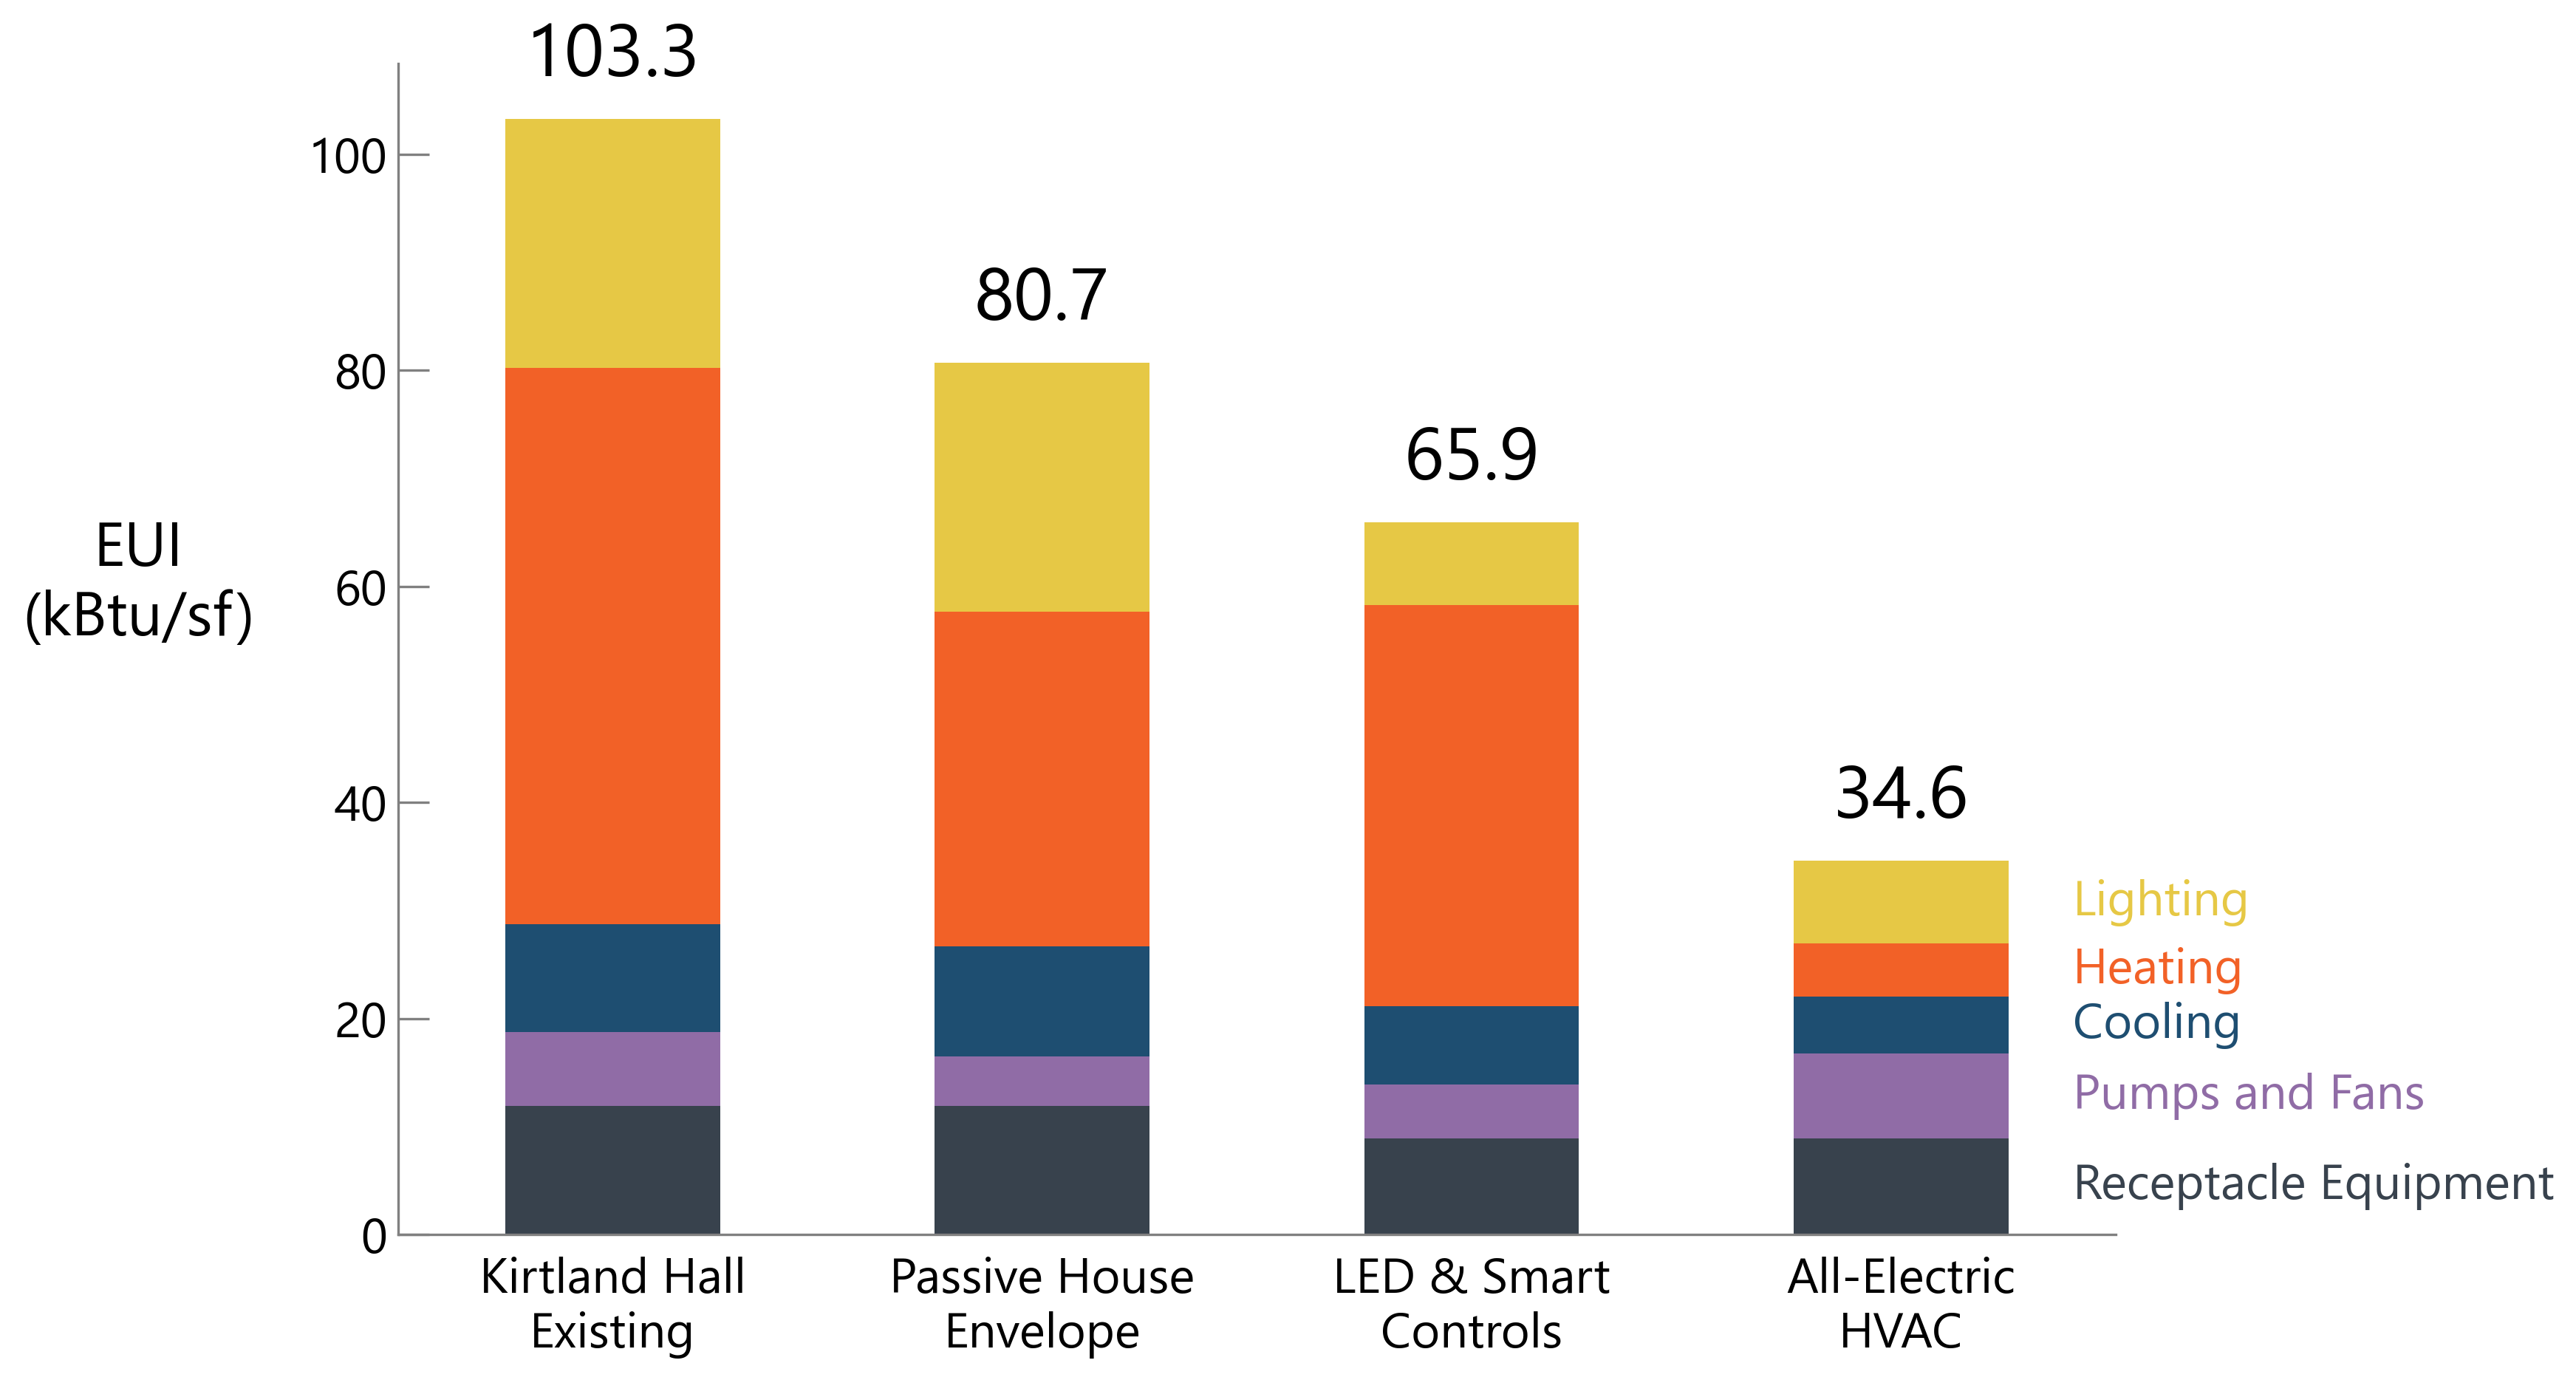

In [161]:
### Create the plot ###
ax = df.plot.bar(stacked=True, color=color_map, figsize=(10,7), rot=0, fontsize=16)
#### DECREASE TEXT SIZE

### Edit the plot characteristics ###
#ax.set_xlabel('Energy Conservation Measures',fontsize=14)
#ax.set_title('Chancery* Annual Energy Consumption of Energy Conservation Measures (w/o Plug Loads)',fontsize=14)
#ax.set_xticklabels(rotation=45)
ax.set_ylabel('EUI\n(kBtu/sf)',fontsize=20, rotation=0, labelpad=55)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start,end,20))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='y',direction='in',color='gray', length=10)
ax.tick_params(axis='x',bottom=False)

### Legends Parameters ###
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], legendLabels[::-1], loc='center left', bbox_to_anchor=(1,0.19), title='End Uses')
ax.get_legend().remove()


### Add labels -- .patches are everything inside of the chart ###
maxHeight = df.iloc[0:1].sum().sum()
for count, rect in enumerate(ax.patches):
  # print(count, rect)

  ### Find where each patch is located ###
  height = rect.get_height()
  width = rect.get_width()
  x = rect.get_x()
  y = rect.get_y()
  
  ### The height of the bar is the data value and can be used as the label ###
  #heightPercentage = height/maxHeight * 100
  #label_text = f'{heightPercentage:.1f}%'  #f'{height:.2f}' to format decimal values
  EUI_text = totalDF[count%len(totalDF)] #EUI Value
  total_text = f'{EUI_text:.1f}' # $kBtu/ft^2$' #EUI display text
  
  ### Find center of patch to place text ###
  label_x = x + width / 2
  label_y = y + height / 2
  label_y_full = y + height + 6

  #  ax.text(label_x, label_y, label_text, ha='center', va='center', color="white",fontsize=10)
  
  ### Place the EUI above the top patch ###
  if label_y_full > totalDF[count % len(totalDF)]:
    # print(label_y_full, totalDF[count % len(totalDF)], total_text)
    ax.text(label_x, label_y_full+3, total_text, ha="center", va='top', color='black', fontsize=24, fontweight='normal')
  
  ### Place the names to the right of the EYP's Design bar ###
  if x > num_of_bars-2:
    ax.text(label_x+0.4, 
            label_y, 
            legendLabels[math.floor(count/num_of_bars)], 
            ha='left', 
            va='center', 
            fontsize=16, 
            color=color_map[math.floor(count/num_of_bars)])